# Python import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 예시: base_path = '/content/drive/MyDrive/Dacon/데이콘_비전_경진대회/'
# 주의: 폴더 경로 끝에 '/'가 있어야 합니다. 없으면 추가해주세요.
# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')
# sub = pd.read_csv('submission.csv')
base_path = '/content/drive/Othercomputers/내 PC/ROKEY_2526/dacon_hidden_letters/'

train = pd.read_csv(base_path + 'train.csv')
test = pd.read_csv(base_path + 'test.csv')
sub = pd.read_csv(base_path + 'submission.csv')

print("데이터 로드 완료!")

데이터 로드 완료!


# Data Preprocessing & EDA

In [4]:
display(train,test,sub)

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,...,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,...,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,...,2,3,1,1,0,4,1,4,3,1


,id,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,...,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,...,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,...,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,...,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,...,4,3,1,4,0,2,1,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20475,22524,P,1,2,1,1,0,0,0,2,...,0,1,3,0,3,0,4,3,1,4
20476,22525,S,4,1,1,4,0,0,1,1,...,1,3,1,0,0,1,3,1,2,0
20477,22526,B,4,2,1,3,2,1,3,0,...,3,2,3,4,1,0,3,3,1,1
20478,22527,K,1,1,2,3,4,0,4,3,...,2,0,0,4,3,3,3,4,4,2


,id,digit
0,2049,0
1,2050,0
2,2051,0
3,2052,0
4,2053,0
...,...,...
20475,22524,0
20476,22525,0
20477,22526,0
20478,22527,0


In [5]:
#distribution of label('digit')
train['digit'].value_counts()

,count
digit,
2,233
5,225
6,212
4,207
3,205
1,202
9,197
7,194
0,191


In [6]:
# drop columns
train2 = train.drop(['id','digit','letter'], axis=1)
test2 = test.drop(['id','letter'], axis=1)

In [7]:
# convert pandas dataframe to numpy array
train2 = train2.values
test2 = test2.values

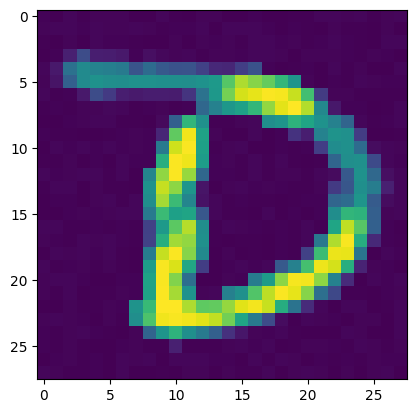

In [8]:
plt.imshow(train2[100].reshape(28,28))

In [9]:
# reshape
train2 = train2.reshape(-1,28,28,1)
test2 = test2.reshape(-1,28,28,1)

In [10]:
# data normalization
train2 = train2/255.0
test2 = test2/255.0

In [11]:
# ImageDatagenerator & data augmentation
idg = ImageDataGenerator(height_shift_range=(-1,1),width_shift_range=(-1,1))
idg2 = ImageDataGenerator()

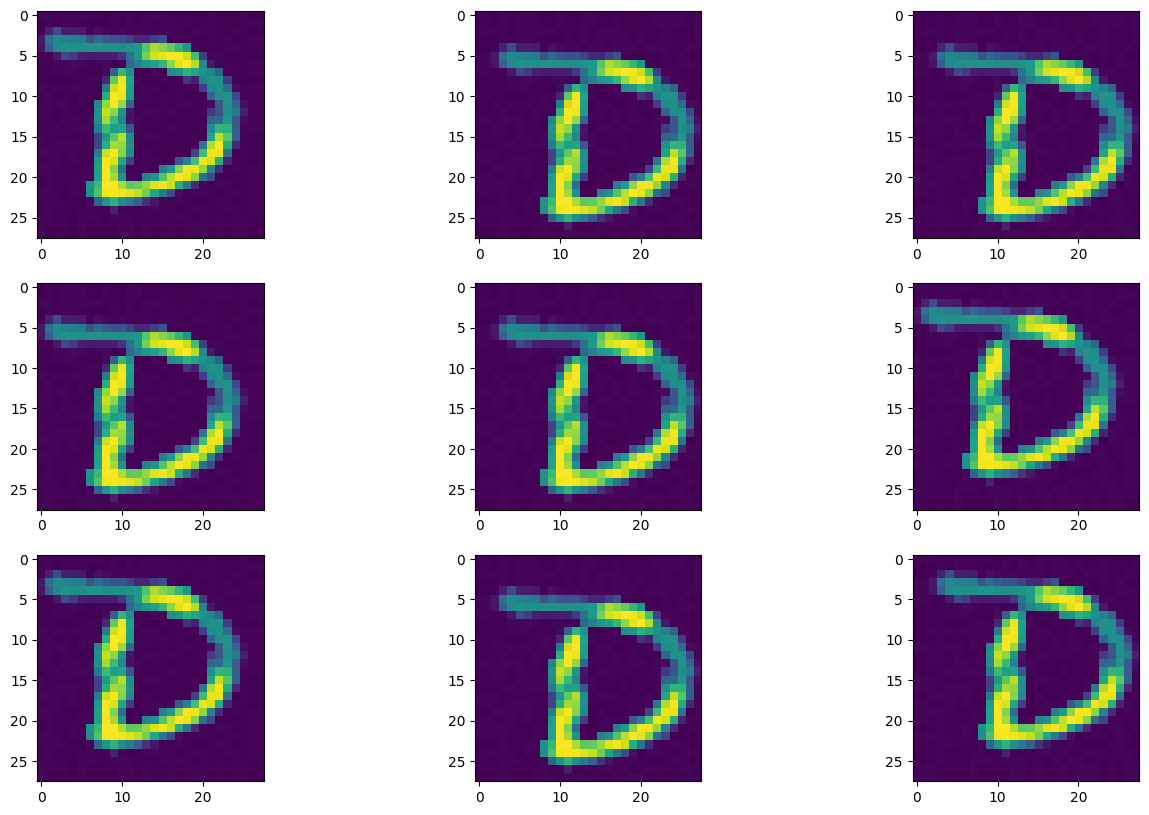

In [12]:
# show augmented image data
sample_data = train2[100].copy()
sample = expand_dims(sample_data,0)
sample_datagen = ImageDataGenerator(height_shift_range=(-1,1), width_shift_range=(-1,1))
sample_generator = sample_datagen.flow(sample, batch_size=1)

plt.figure(figsize=(16,10))

for i in range(9) :
    plt.subplot(3,3,i+1)
    # sample_generator.next() -> next(sample_generator) 로 수정
    sample_batch = next(sample_generator)
    sample_image=sample_batch[0]
    plt.imshow(sample_image.reshape(28,28))

# Validation

In [13]:
# cross validation
skf = StratifiedKFold(n_splits=40, random_state=42, shuffle=True)

# Modeling

In [18]:
%%time

reLR = ReduceLROnPlateau(patience=100,verbose=1,factor=0.5) #learning rate scheduler
es = EarlyStopping(patience=160, verbose=1)

val_loss_min = []
result = 0
nth = 0

for train_index, valid_index in skf.split(train2,train['digit']) :

    mc = ModelCheckpoint('best_cvision.h5',save_best_only=True, verbose=1)

    x_train = train2[train_index]
    x_valid = train2[valid_index]
    y_train = train['digit'][train_index]
    y_valid = train['digit'][valid_index]

    train_generator = idg.flow(x_train,y_train,batch_size=8)
    valid_generator = idg2.flow(x_valid,y_valid, batch_size=8)
    test_generator = idg2.flow(test2,shuffle=False, batch_size=8)

    model = Sequential()

    # Input layer added explicitly to avoid warnings
    model.add(Input(shape=(28,28,1)))
    model.add(Conv2D(16,(3,3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32,(5,5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32,(5,5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32,(5,5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((3,3)))
    model.add(Dropout(0.3))

    model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(5,5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((3,3)))
    model.add(Dropout(0.3))

    model.add(Flatten())

    model.add(Dense(128,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(10,activation='softmax'))

    # Fix: lr -> learning_rate
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.002,epsilon=1e-07),metrics=['acc'])

    # Fix: fit_generator -> fit
    learning_history = model.fit(train_generator,epochs=2000, validation_data=valid_generator, callbacks=[es,mc,reLR])

    # predict
    model.load_weights('best_cvision.h5')
    # Fix: predict_generator -> predict
    result += model.predict(test_generator,verbose=True)/40

    # save val_loss
    hist = pd.DataFrame(learning_history.history)
    val_loss_min.append(hist['val_loss'].min())

    nth += 1
    print(nth, '번째 학습을 완료했습니다.')

Epoch 1/2000


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - acc: 0.1162 - loss: 3.1320
Epoch 1: val_loss improved from inf to 2.35286, saving model to best_cvision.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 683ms/step - acc: 0.1171 - loss: 3.1083 - val_acc: 0.0962 - val_loss: 2.3529 - learning_rate: 0.0020
Epoch 2/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.1747 - loss: 2.5452
Epoch 2: val_loss did not improve from 2.35286
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.1761 - loss: 2.5378 - val_acc: 0.0962 - val_loss: 2.5650 - learning_rate: 0.0020
Epoch 3/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.1988 - loss: 2.3004
Epoch 3: val_loss did not improve from 2.35286
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.2019 - loss: 2.2912 - val_acc: 0.0962 - val_loss: 2.8880 - learning_rate: 0.0020
Epoch 4/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.2791 - loss: 2.0333
Epoch 4: val_loss did not improve from 2.35286
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.2815 - loss: 2.0273 - val_acc: 0.0962 - val_loss: 4.4538 - learning_rate: 0.0020
Epoch 5/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.3753 - loss: 1.7418
Epoch 5: 

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - acc: 0.9058 - loss: 0.2776 - val_acc: 0.5000 - val_loss: 2.1879 - learning_rate: 0.0020
Epoch 37/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - acc: 0.9281 - loss: 0.2567
Epoch 37: val_loss did not improve from 2.18792
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - acc: 0.9264 - loss: 0.2586 - val_acc: 0.2308 - val_loss: 3.5985 - learning_rate: 0.0020
Epoch 38/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.8936 - loss: 0.2954
Epoch 38: val_loss did not improve from 2.18792
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - acc: 0.8943 - loss: 0.2950 - val_acc: 0.3462 - val_loss: 2.8520 - learning_rate: 0.0020
Epoch 39/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9191 - loss: 0.2509
Epoch 39: val_loss improved from 2.18792 to 1.72902, saving model to best_cvision.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - acc: 0.9176 - loss: 0.2542 - val_acc: 0.5577 - val_loss: 1.7290 - learning_rate: 0.0020
Epoch 40/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.8923 - loss: 0.2958
Epoch 40: val_loss improved from 1.72902 to 0.89897, saving model to best_cvision.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - acc: 0.8925 - loss: 0.2954 - val_acc: 0.7308 - val_loss: 0.8990 - learning_rate: 0.0020
Epoch 41/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - acc: 0.9123 - loss: 0.2913
Epoch 41: val_loss improved from 0.89897 to 0.77512, saving model to best_cvision.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - acc: 0.9124 - loss: 0.2899 - val_acc: 0.7885 - val_loss: 0.7751 - learning_rate: 0.0020
Epoch 42/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9286 - loss: 0.2211
Epoch 42: val_loss improved from 0.77512 to 0.64654, saving model to best_cvision.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - acc: 0.9283 - loss: 0.2214 - val_acc: 0.7885 - val_loss: 0.6465 - learning_rate: 0.0020
Epoch 43/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9254 - loss: 0.2160
Epoch 43: val_loss did not improve from 0.64654
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - acc: 0.9249 - loss: 0.2178 - val_acc: 0.6731 - val_loss: 1.2542 - learning_rate: 0.0020
Epoch 44/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9393 - loss: 0.2228
Epoch 44: val_loss improved from 0.64654 to 0.58903, saving model to best_cvision.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - acc: 0.9380 - loss: 0.2237 - val_acc: 0.8077 - val_loss: 0.5890 - learning_rate: 0.0020
Epoch 45/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9094 - loss: 0.2286
Epoch 45: val_loss did not improve from 0.58903
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - acc: 0.9103 - loss: 0.2293 - val_acc: 0.7500 - val_loss: 0.9357 - learning_rate: 0.0020
Epoch 46/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.9336 - loss: 0.1830
Epoch 46: val_loss improved from 0.58903 to 0.47301, saving model to best_cvision.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - acc: 0.9334 - loss: 0.1854 - val_acc: 0.8269 - val_loss: 0.4730 - learning_rate: 0.0020
Epoch 47/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9250 - loss: 0.2232
Epoch 47: val_loss did not improve from 0.47301
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - acc: 0.9247 - loss: 0.2239 - val_acc: 0.8462 - val_loss: 0.5666 - learning_rate: 0.0020
Epoch 48/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9096 - loss: 0.2346
Epoch 48: val_loss did not improve from 0.47301
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - acc: 0.9111 - loss: 0.2328 - val_acc: 0.7885 - val_loss: 0.5728 - learning_rate: 0.0020
Epoch 49/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9351 - loss: 0.1800
Epoch 49: val_loss improved from 0.47301 to 0.40579, saving model to best_cvision.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - acc: 0.9344 - loss: 0.1819 - val_acc: 0.8846 - val_loss: 0.4058 - learning_rate: 0.0020
Epoch 50/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.9356 - loss: 0.1760
Epoch 50: val_loss did not improve from 0.40579
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.9343 - loss: 0.1802 - val_acc: 0.8462 - val_loss: 0.4768 - learning_rate: 0.0020
Epoch 51/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.9531 - loss: 0.1569
Epoch 51: val_loss improved from 0.40579 to 0.37688, saving model to best_cvision.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - acc: 0.9520 - loss: 0.1590 - val_acc: 0.8654 - val_loss: 0.3769 - learning_rate: 0.0020
Epoch 52/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - acc: 0.9503 - loss: 0.1717
Epoch 52: val_loss did not improve from 0.37688
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.9495 - loss: 0.1726 - val_acc: 0.9038 - val_loss: 0.4209 - learning_rate: 0.0020
Epoch 53/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.9296 - loss: 0.1976
Epoch 53: val_loss did not improve from 0.37688
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.9296 - loss: 0.1969 - val_acc: 0.8846 - val_loss: 0.4344 - learning_rate: 0.0020
Epoch 54/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9565 - loss: 0.1521
Epoch 54: val_loss improved from 0.37688 to 0.29245, saving model to best_cvision.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - acc: 0.9547 - loss: 0.1553 - val_acc: 0.9231 - val_loss: 0.2925 - learning_rate: 0.0020
Epoch 55/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - acc: 0.9377 - loss: 0.1767
Epoch 55: val_loss did not improve from 0.29245
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.9372 - loss: 0.1783 - val_acc: 0.8846 - val_loss: 0.3647 - learning_rate: 0.0020
Epoch 56/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.9457 - loss: 0.1652
Epoch 56: val_loss did not improve from 0.29245
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.9450 - loss: 0.1657 - val_acc: 0.8269 - val_loss: 0.6481 - learning_rate: 0.0020
Epoch 57/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9403 - loss: 0.1724
Epoch 57: val_loss did not improve from 0.29245
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - acc: 0.9402 - loss: 0.1727 - val_acc: 0.8462 - val_loss: 0.4954 - learning_rate: 0.0020
Epoch 58/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.9409 - loss: 0.1690
Epoc

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - acc: 0.9583 - loss: 0.1390 - val_acc: 0.9423 - val_loss: 0.2686 - learning_rate: 0.0020
Epoch 63/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.9638 - loss: 0.1274
Epoch 63: val_loss did not improve from 0.26863
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - acc: 0.9632 - loss: 0.1287 - val_acc: 0.8846 - val_loss: 0.4790 - learning_rate: 0.0020
Epoch 64/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9458 - loss: 0.1601
Epoch 64: val_loss did not improve from 0.26863
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - acc: 0.9462 - loss: 0.1591 - val_acc: 0.8462 - val_loss: 0.4293 - learning_rate: 0.0020
Epoch 65/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9487 - loss: 0.1478
Epoch 65: val_loss did not improve from 0.26863
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - acc: 0.9486 - loss: 0.1480 - val_acc: 0.9038 - val_loss: 0.4495 - learning_rate: 0.0020
Epoch 66/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.9575 - loss: 0.1280
Epoc

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - acc: 0.1287 - loss: 3.0170

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 2.25867, saving model to best_cvision.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 577ms/step - acc: 0.1295 - loss: 3.0101 - val_acc: 0.1346 - val_loss: 2.2587 - learning_rate: 0.0020
Epoch 2/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.1808 - loss: 2.5341
Epoch 2: val_loss did not improve from 2.25867
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.1842 - loss: 2.5203 - val_acc: 0.0962 - val_loss: 2.3985 - learning_rate: 0.0020
Epoch 3/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.2488 - loss: 2.1668
Epoch 3: val_loss did not improve from 2.25867
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.2508 - loss: 2.1616 - val_acc: 0.0962 - val_loss: 2.9108 - learning_rate: 0.0020
Epoch 4/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.2968 - loss: 1.9811
Epoch 4: val_loss did not improve from 2.25867
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - acc: 0.2978 - loss: 1.9781 - val_acc: 0.0962 - val_loss: 3.6828 - learning_rate: 0.0020
Epoch 5/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.3489 - loss: 1.9028
Epoch 5: 

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - acc: 0.9024 - loss: 0.2856 - val_acc: 0.5000 - val_loss: 1.8964 - learning_rate: 0.0020
Epoch 36/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9132 - loss: 0.2692
Epoch 36: val_loss did not improve from 1.89641
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.9125 - loss: 0.2717 - val_acc: 0.3077 - val_loss: 3.2576 - learning_rate: 0.0020
Epoch 37/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.9146 - loss: 0.2532
Epoch 37: val_loss did not improve from 1.89641
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.9134 - loss: 0.2560 - val_acc: 0.3462 - val_loss: 2.8338 - learning_rate: 0.0020
Epoch 38/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.9045 - loss: 0.2814
Epoch 38: val_loss did not improve from 1.89641
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.9047 - loss: 0.2815 - val_acc: 0.4423 - val_loss: 2.0817 - learning_rate: 0.0020
Epoch 39/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - acc: 0.9280 - loss: 0.2337
Epoc

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - acc: 0.9267 - loss: 0.2369 - val_acc: 0.7308 - val_loss: 0.7422 - learning_rate: 0.0020
Epoch 40/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.9049 - loss: 0.2952
Epoch 40: val_loss did not improve from 0.74220
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.9057 - loss: 0.2936 - val_acc: 0.5962 - val_loss: 0.9912 - learning_rate: 0.0020
Epoch 41/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.9195 - loss: 0.2292
Epoch 41: val_loss did not improve from 0.74220
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.9198 - loss: 0.2302 - val_acc: 0.7308 - val_loss: 0.8293 - learning_rate: 0.0020
Epoch 42/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9239 - loss: 0.2188
Epoch 42: val_loss improved from 0.74220 to 0.72732, saving model to best_cvision.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - acc: 0.9238 - loss: 0.2192 - val_acc: 0.7885 - val_loss: 0.7273 - learning_rate: 0.0020
Epoch 43/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.9179 - loss: 0.2356
Epoch 43: val_loss did not improve from 0.72732
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.9185 - loss: 0.2353 - val_acc: 0.7308 - val_loss: 0.8704 - learning_rate: 0.0020
Epoch 44/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9128 - loss: 0.2450
Epoch 44: val_loss improved from 0.72732 to 0.50967, saving model to best_cvision.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - acc: 0.9137 - loss: 0.2431 - val_acc: 0.8462 - val_loss: 0.5097 - learning_rate: 0.0020
Epoch 45/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9360 - loss: 0.1985
Epoch 45: val_loss did not improve from 0.50967
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - acc: 0.9355 - loss: 0.1999 - val_acc: 0.8077 - val_loss: 0.5752 - learning_rate: 0.0020
Epoch 46/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9279 - loss: 0.2133
Epoch 46: val_loss did not improve from 0.50967
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - acc: 0.9284 - loss: 0.2120 - val_acc: 0.7308 - val_loss: 0.7229 - learning_rate: 0.0020
Epoch 47/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9176 - loss: 0.2224
Epoch 47: val_loss improved from 0.50967 to 0.40029, saving model to best_cvision.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - acc: 0.9188 - loss: 0.2211 - val_acc: 0.8846 - val_loss: 0.4003 - learning_rate: 0.0020
Epoch 48/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9311 - loss: 0.1784
Epoch 48: val_loss did not improve from 0.40029
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - acc: 0.9306 - loss: 0.1815 - val_acc: 0.8269 - val_loss: 0.4208 - learning_rate: 0.0020
Epoch 49/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.9364 - loss: 0.1715
Epoch 49: val_loss did not improve from 0.40029
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.9350 - loss: 0.1755 - val_acc: 0.8846 - val_loss: 0.4254 - learning_rate: 0.0020
Epoch 50/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - acc: 0.9366 - loss: 0.2147
Epoch 50: val_loss improved from 0.40029 to 0.31175, saving model to best_cvision.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - acc: 0.9367 - loss: 0.2129 - val_acc: 0.8654 - val_loss: 0.3117 - learning_rate: 0.0020
Epoch 51/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - acc: 0.9404 - loss: 0.1782
Epoch 51: val_loss improved from 0.31175 to 0.29635, saving model to best_cvision.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - acc: 0.9400 - loss: 0.1798 - val_acc: 0.8846 - val_loss: 0.2963 - learning_rate: 0.0020
Epoch 52/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9300 - loss: 0.2029
Epoch 52: val_loss did not improve from 0.29635
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - acc: 0.9298 - loss: 0.2026 - val_acc: 0.8654 - val_loss: 0.3875 - learning_rate: 0.0020
Epoch 53/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.9395 - loss: 0.1827
Epoch 53: val_loss did not improve from 0.29635
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.9402 - loss: 0.1817 - val_acc: 0.9038 - val_loss: 0.4246 - learning_rate: 0.0020
Epoch 54/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9402 - loss: 0.1634
Epoch 54: val_loss did not improve from 0.29635
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - acc: 0.9394 - loss: 0.1669 - val_acc: 0.8654 - val_loss: 0.3674 - learning_rate: 0.0020
Epoch 55/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.9530 - loss: 0.1437
Epoc

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - acc: 0.9811 - loss: 0.0729 - val_acc: 0.8654 - val_loss: 0.2938 - learning_rate: 0.0020
Epoch 93/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9739 - loss: 0.0838
Epoch 93: val_loss did not improve from 0.29378
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - acc: 0.9734 - loss: 0.0841 - val_acc: 0.8846 - val_loss: 0.3601 - learning_rate: 0.0020
Epoch 94/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9772 - loss: 0.0717
Epoch 94: val_loss did not improve from 0.29378
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - acc: 0.9770 - loss: 0.0719 - val_acc: 0.8654 - val_loss: 0.4173 - learning_rate: 0.0020
Epoch 95/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.9701 - loss: 0.0763
Epoch 95: val_loss did not improve from 0.29378
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.9702 - loss: 0.0762 - val_acc: 0.8846 - val_loss: 0.4152 - learning_rate: 0.0020
Epoch 96/2000
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.9697 - loss: 0.0764
Epoc

KeyboardInterrupt: 

In [15]:
display(val_loss_min, np.mean(val_loss_min))

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[]

np.float64(nan)

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 9, 9, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 9, 9, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 9, 9, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 859,968 (3.28 MB)

 Trainable params: 286,346 (1.09 MB)

 Non-trainable params: 928 (3.62 KB)

 Optimizer params: 572,694 (2.18 MB)

# Submission

In [17]:
sub['digit'] = result.argmax(1)

AttributeError: 'int' object has no attribute 'argmax'

In [ ]:
sub

In [ ]:
sub.to_csv('Dacon_cvision_0914_40_epsNone.csv',index=False)